<a href="https://colab.research.google.com/github/Epsita-R/Epsita/blob/main/2348517_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Load and run the dataset
data = pd.read_csv('/content/Market_Basket_Optimisation (1).csv')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check for null values
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [4]:
# Fill null values with "NA")
data_filled = data.fillna("NA")
print(data_filled.isnull().sum())

shrimp               0
almonds              0
avocado              0
vegetables mix       0
green grapes         0
whole weat flour     0
yams                 0
cottage cheese       0
energy drink         0
tomato juice         0
low fat yogurt       0
green tea            0
honey                0
salad                0
mineral water        0
salmon               0
antioxydant juice    0
frozen smoothie      0
spinach              0
olive oil            0
dtype: int64


In [15]:
#Encoding Categorical data to numerical data
#One-hot encoding
from sklearn.preprocessing import LabelEncoder
df_encoded = pd.get_dummies(data, columns=["shrimp","olive oil","almonds","avocado","vegetables mix","green grapes","whole weat flour","yams","cottage cheese","energy drink","tomato juice","low fat yogurt","green tea","honey","salad","mineral water","salmon","antioxydant juice","frozen smoothie","spinach"])
df_encoded.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp_almonds,shrimp_antioxydant juice,shrimp_asparagus,shrimp_avocado,shrimp_babies food,shrimp_bacon,shrimp_barbecue sauce,shrimp_black tea,shrimp_blueberries,shrimp_body spray,...,salmon_frozen smoothie,salmon_magazines,salmon_protein bar,salmon_sparkling water,antioxydant juice_french fries,antioxydant juice_frozen smoothie,frozen smoothie_protein bar,frozen smoothie_spinach,spinach_cereals,spinach_mayonnaise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#  convert the data into a binary matrix format
binary_matrix = data.notna().astype(int)
binary_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


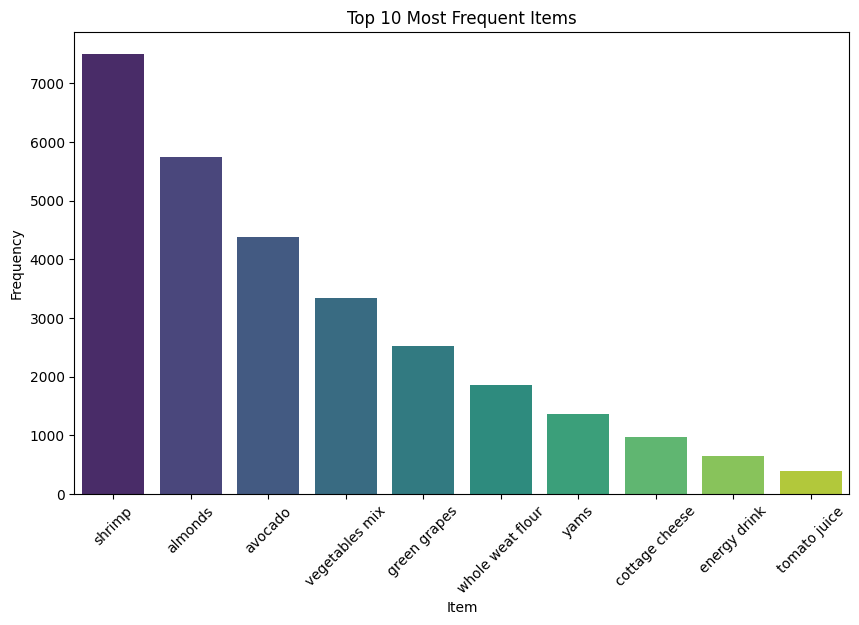

In [18]:
#Item frequency analysis
# Count the frequency of each item
item_counts = data.apply(lambda x: x.value_counts()).fillna(0)
# Plot the top 10 most frequent items
top_items = item_counts.sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.show()


In [19]:
transactions=[]
for index,row in data.iterrows():
  transactions.append(row.dropna().tolist())
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [20]:
# Find frequent itemsets with minimum support
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.076800,(shrimp_burgers),1
1,0.013067,(shrimp_cake),1
2,0.052133,(shrimp_chocolate),1
3,0.036000,(shrimp_cookies),1
4,0.037200,(shrimp_eggs),1
...,...,...,...
84,0.010267,"(shrimp_shrimp, almonds_frozen vegetables)",2
85,0.013333,"(almonds_mineral water, shrimp_spaghetti)",2
86,0.011867,"(avocado_spaghetti, almonds_ground beef)",2
87,0.017733,"(avocado_mineral water, almonds_spaghetti)",2


In [21]:
popular_items=frequent_itemsets[frequent_itemsets['length']==1]
popular_items.drop("length",axis=1).sort_values(by='support',ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
15,0.076933,(shrimp_mineral water)
0,0.076800,(shrimp_burgers)
38,0.064533,(almonds_mineral water)
22,0.061067,(shrimp_turkey)
43,0.054800,(almonds_spaghetti)
2,0.052133,(shrimp_chocolate)
56,0.050000,(avocado_mineral water)
8,0.049733,(shrimp_frozen vegetables)
20,0.047200,(shrimp_spaghetti)
18,0.043200,(shrimp_shrimp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


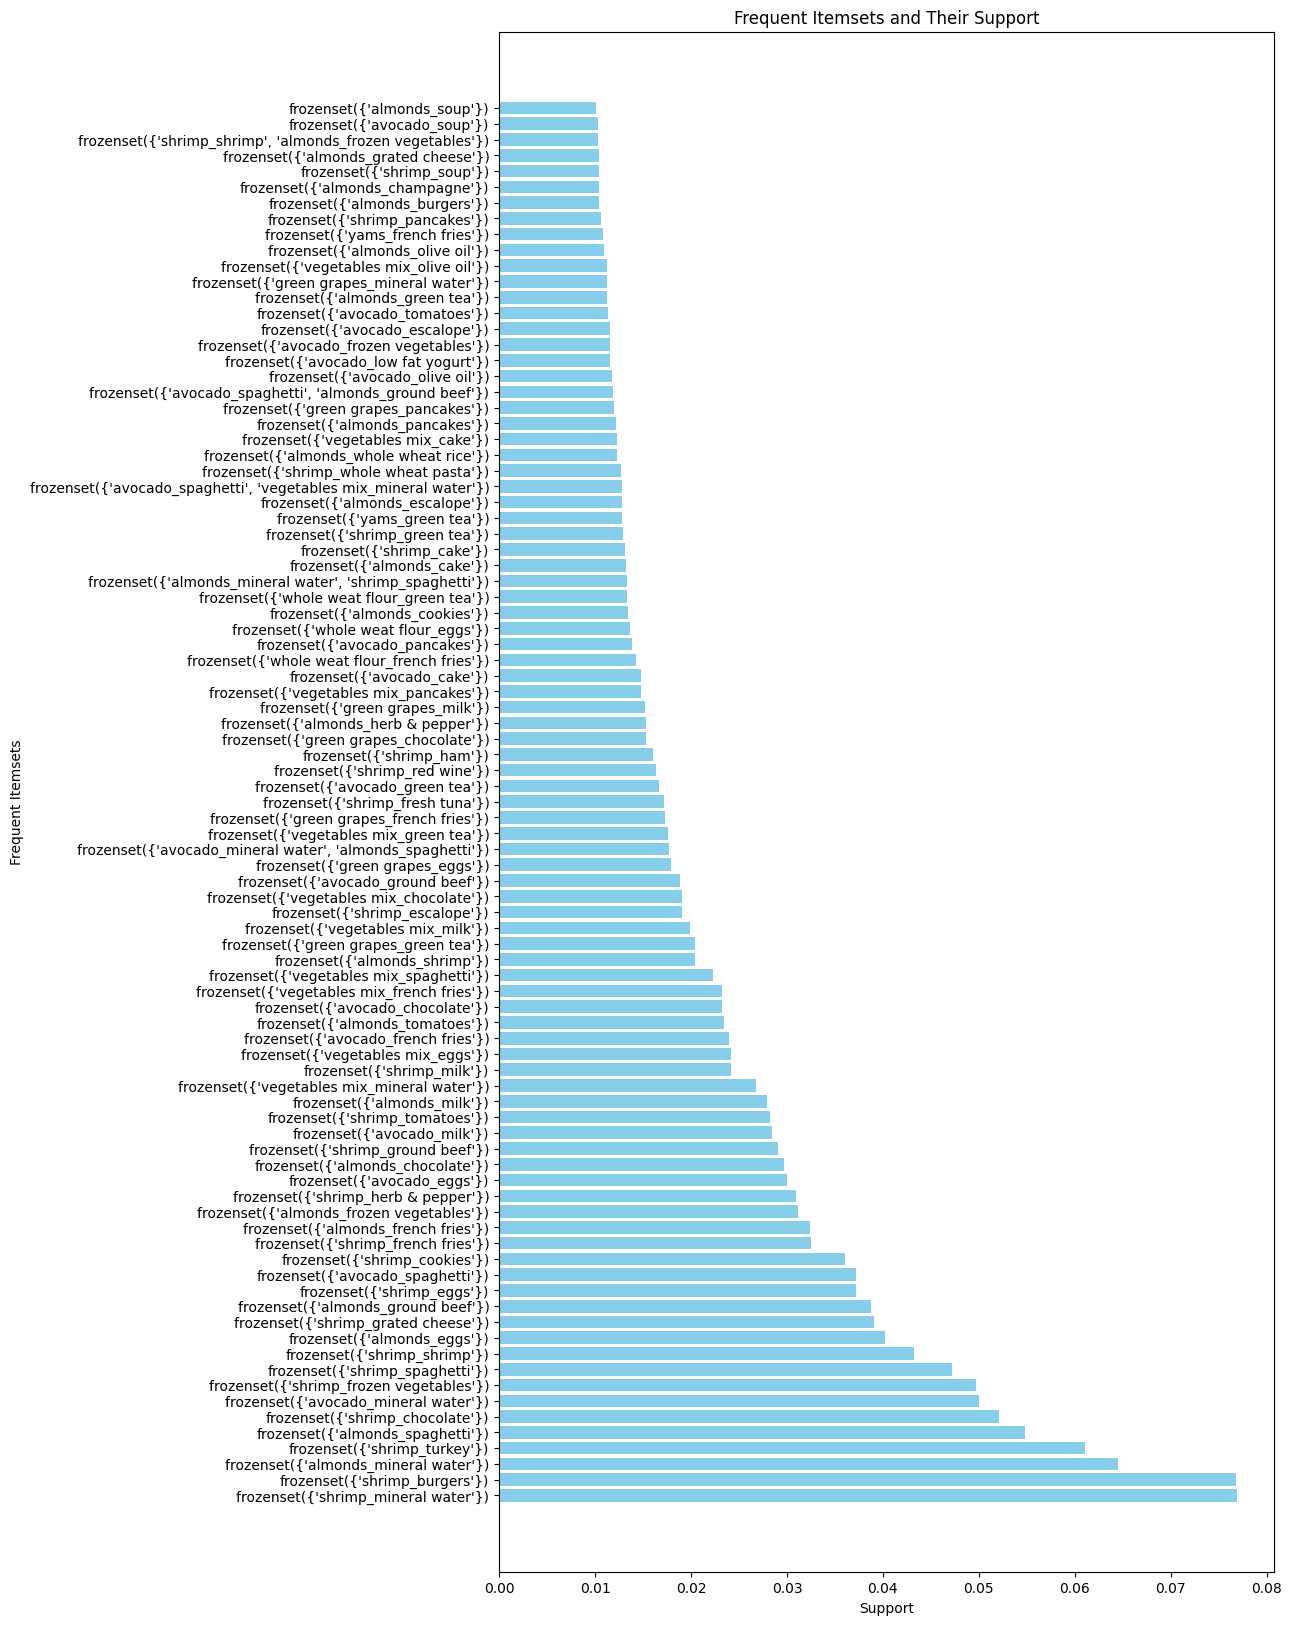

In [22]:
#assigning the itemset in ascending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
#plotting the frequent itemset
plt.figure(figsize=(10, 20))
plt.barh(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets and Their Support')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


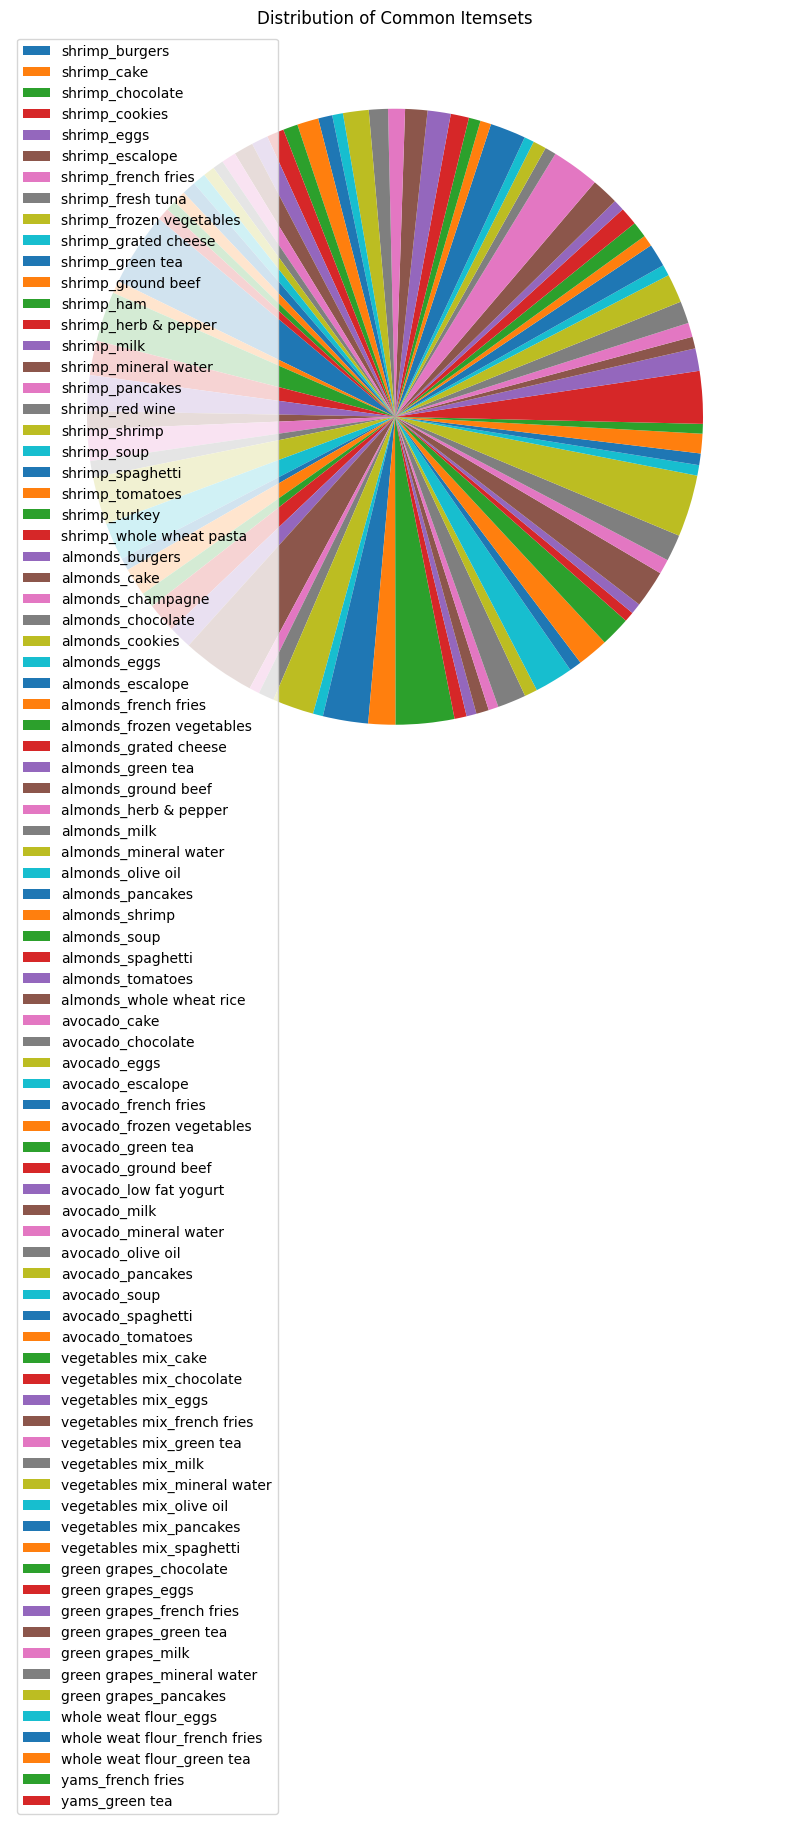

In [23]:
# Calculate the distribution of common itemsets
support_values=popular_items['support'].values
total_support=sum(support_values)
percentages=[(support/total_support)*100 for support in support_values]
labels=popular_items['itemsets'].apply(lambda itemset:','.join(itemset))
# Create a pie chart to visualize the distribution
plt.figure(figsize=(10, 10))
plt.pie(percentages,startangle=140)
plt.subplots_adjust(right=4.6)
plt.legend(labels,loc=0)
plt.title('Distribution of Common Itemsets')
plt.show()

In [ ]:
# Generate association rules with minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


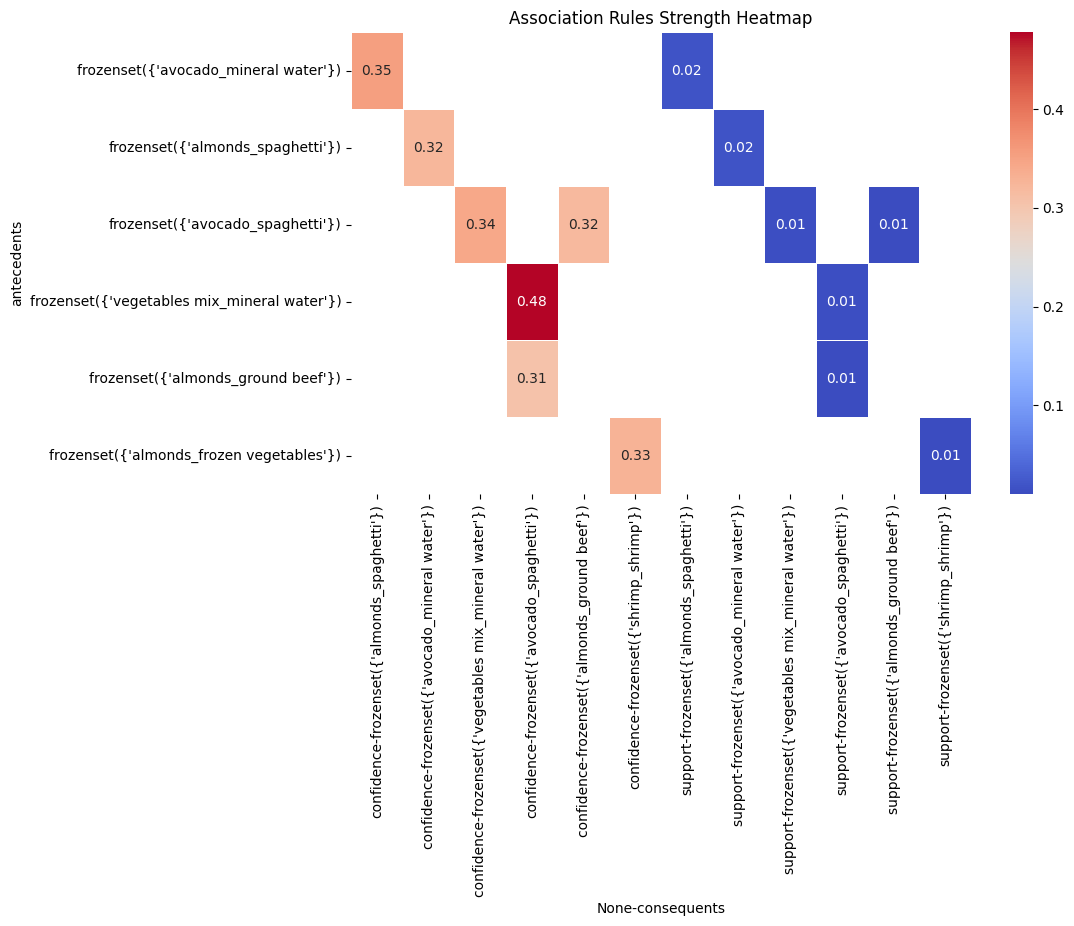

In [25]:
# Create a heatmap of support and confidence values
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values=['support', 'confidence'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Association Rules Strength Heatmap')
plt.show()

In [26]:
rules.sort_values(by="support", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado_mineral water),(almonds_spaghetti),0.0500,0.0548,0.017733,0.354667,6.472019,0.014993,1.464669,0.889988
1,(almonds_spaghetti),(avocado_mineral water),0.0548,0.0500,0.017733,0.323601,6.472019,0.014993,1.404496,0.894508
2,(avocado_spaghetti),(vegetables mix_mineral water),0.0372,0.0268,0.012800,0.344086,12.839031,0.011803,1.483731,0.957740
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0268,0.0372,0.012800,0.477612,12.839031,0.011803,1.843074,0.947506
4,(avocado_spaghetti),(almonds_ground beef),0.0372,0.0388,0.011867,0.318996,8.221557,0.010423,1.411446,0.912306
5,(almonds_ground beef),(avocado_spaghetti),0.0388,0.0372,0.011867,0.305842,8.221557,0.010423,1.387004,0.913825
6,(almonds_frozen vegetables),(shrimp_shrimp),0.0312,0.0432,0.010267,0.329060,7.617126,0.008919,1.426059,0.896694


In [27]:
rules.sort_values(by="confidence", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0268,0.0372,0.012800,0.477612,12.839031,0.011803,1.843074,0.947506
0,(avocado_mineral water),(almonds_spaghetti),0.0500,0.0548,0.017733,0.354667,6.472019,0.014993,1.464669,0.889988
2,(avocado_spaghetti),(vegetables mix_mineral water),0.0372,0.0268,0.012800,0.344086,12.839031,0.011803,1.483731,0.957740
6,(almonds_frozen vegetables),(shrimp_shrimp),0.0312,0.0432,0.010267,0.329060,7.617126,0.008919,1.426059,0.896694
1,(almonds_spaghetti),(avocado_mineral water),0.0548,0.0500,0.017733,0.323601,6.472019,0.014993,1.404496,0.894508
4,(avocado_spaghetti),(almonds_ground beef),0.0372,0.0388,0.011867,0.318996,8.221557,0.010423,1.411446,0.912306
5,(almonds_ground beef),(avocado_spaghetti),0.0388,0.0372,0.011867,0.305842,8.221557,0.010423,1.387004,0.913825


In [28]:
rules.sort_values(by="lift", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0268,0.0372,0.012800,0.477612,12.839031,0.011803,1.843074,0.947506
2,(avocado_spaghetti),(vegetables mix_mineral water),0.0372,0.0268,0.012800,0.344086,12.839031,0.011803,1.483731,0.957740
4,(avocado_spaghetti),(almonds_ground beef),0.0372,0.0388,0.011867,0.318996,8.221557,0.010423,1.411446,0.912306
5,(almonds_ground beef),(avocado_spaghetti),0.0388,0.0372,0.011867,0.305842,8.221557,0.010423,1.387004,0.913825
6,(almonds_frozen vegetables),(shrimp_shrimp),0.0312,0.0432,0.010267,0.329060,7.617126,0.008919,1.426059,0.896694
1,(almonds_spaghetti),(avocado_mineral water),0.0548,0.0500,0.017733,0.323601,6.472019,0.014993,1.404496,0.894508
0,(avocado_mineral water),(almonds_spaghetti),0.0500,0.0548,0.017733,0.354667,6.472019,0.014993,1.464669,0.889988


In [29]:
rules.sort_values(by="conviction", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0268,0.0372,0.012800,0.477612,12.839031,0.011803,1.843074,0.947506
2,(avocado_spaghetti),(vegetables mix_mineral water),0.0372,0.0268,0.012800,0.344086,12.839031,0.011803,1.483731,0.957740
0,(avocado_mineral water),(almonds_spaghetti),0.0500,0.0548,0.017733,0.354667,6.472019,0.014993,1.464669,0.889988
6,(almonds_frozen vegetables),(shrimp_shrimp),0.0312,0.0432,0.010267,0.329060,7.617126,0.008919,1.426059,0.896694
4,(avocado_spaghetti),(almonds_ground beef),0.0372,0.0388,0.011867,0.318996,8.221557,0.010423,1.411446,0.912306
1,(almonds_spaghetti),(avocado_mineral water),0.0548,0.0500,0.017733,0.323601,6.472019,0.014993,1.404496,0.894508
5,(almonds_ground beef),(avocado_spaghetti),0.0388,0.0372,0.011867,0.305842,8.221557,0.010423,1.387004,0.913825


In [30]:
rules[ (rules['confidence'] > 0.4) &
       (rules['lift'] > 1.8) &
       (rules['conviction'] > 1.2)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0268,0.0372,0.0128,0.477612,12.839031,0.011803,1.843074,0.947506


In [31]:
rules = rules[(rules['consequents'] != {'mineral water'}) & (rules['consequents'] != {'spaghetti'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
rules.sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0268,0.0372,0.012800,0.477612,12.839031,0.011803,1.843074,0.947506
2,(avocado_spaghetti),(vegetables mix_mineral water),0.0372,0.0268,0.012800,0.344086,12.839031,0.011803,1.483731,0.957740
4,(avocado_spaghetti),(almonds_ground beef),0.0372,0.0388,0.011867,0.318996,8.221557,0.010423,1.411446,0.912306
5,(almonds_ground beef),(avocado_spaghetti),0.0388,0.0372,0.011867,0.305842,8.221557,0.010423,1.387004,0.913825
6,(almonds_frozen vegetables),(shrimp_shrimp),0.0312,0.0432,0.010267,0.329060,7.617126,0.008919,1.426059,0.896694
1,(almonds_spaghetti),(avocado_mineral water),0.0548,0.0500,0.017733,0.323601,6.472019,0.014993,1.404496,0.894508
0,(avocado_mineral water),(almonds_spaghetti),0.0500,0.0548,0.017733,0.354667,6.472019,0.014993,1.464669,0.889988
